# Spritz quick look

This is the result of noise free runs using lisa instrument and lisanode at dt=0.25s, with lasernoise removed by TDI

- MBHB dataset 1 is MBHB#0 from sangria data (a loud event), with 3 short glitches on top of it
- MBHB dataset 2 is MBHB#6 from sangria data, with a ~5h glitch on top of it
- VGB dataset is the 17 verification binaries of sangria data, with an LPF like distribution of glitches on top of them 

The 2 MBHB dataset have a duration of 1 month. 

The VGB dataset should be 1 year long, at this stage we only produce 7 days.

We report on CPU time needed to produce those data below:

|           | lisa instrument | lisanode |
|-----------|-----------------|----------|
| 30 days   | ~ 3h            | ~ 20 min |
| 7 days    | ~ 35 min        | ~ 8 min  |

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import ldc.io.hdf5 as h5io
from ldc.lisa.orbits import Orbits
from ldc.lisa.projection import ProjectedStrain
from ldc.common.tools import window
import scipy.signal
from ldc.lisa.noise import get_noise_model

## Quicklook at MBHB data set 1

In [2]:
mbhb1_li, attr = h5io.load_array("../run3/mbhb1-lisainstrument-noisefree-tdi.h5")
mbhb1_ln, attr = h5io.load_array("../run3/mbhb1-lisanode-noisefree-tdi.h5")

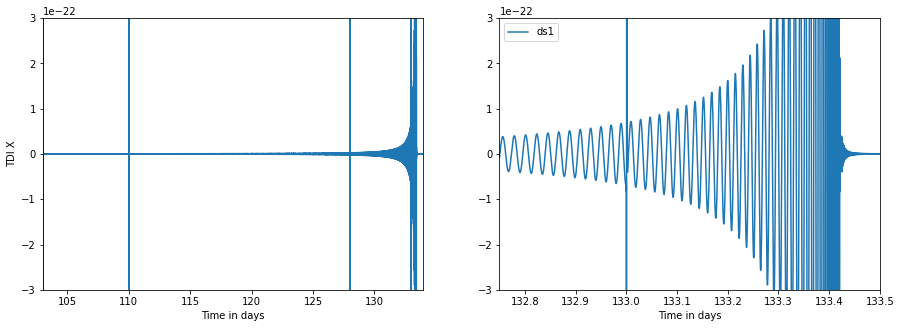

In [3]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(mbhb1_li[:,0]/(24*60*60), mbhb1_li[:,1], label="ds1")
plt.axis([103,134,-3e-22,3e-22])
plt.xlabel("Time in days")
plt.ylabel("TDI X")
plt.subplot(122)
plt.plot(mbhb1_li[:,0]/(24*60*60), mbhb1_li[:,1], label="ds1")
plt.axis([132.75,133.50,-3e-22,3e-22])
plt.xlabel("Time in days")
plt.legend()

## Comparison with expected GW signal 

In [4]:
cat, units = h5io.load_array("../run1/mbhb1-cat.h5")
config = {"nominal_arm_length": 2500000000, "orbit_type": 'file', "filename":"../run1/orbits.h5"}
lisa_orbits = Orbits.type(config)
projector = ProjectedStrain(lisa_orbits)
projector.from_file("../run4/mbhb1-y.h5")

In [5]:
tdi_nosim_li = projector.compute_tdi_x(mbhb1_li[:,0], tdi2=True)
tdi_nosim_ln = projector.compute_tdi_x(mbhb1_ln[:,0], tdi2=True)

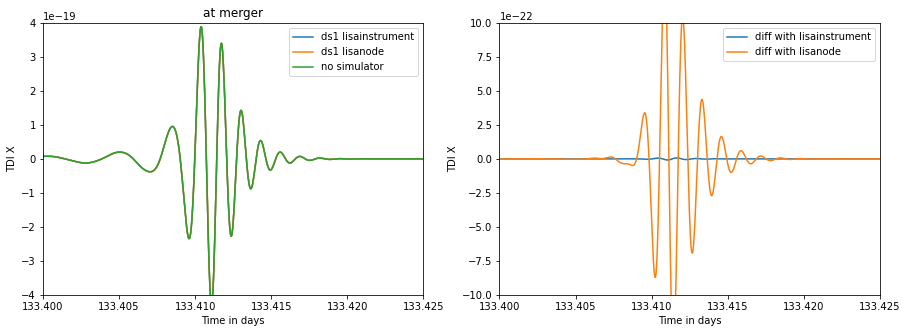

In [6]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("at merger")
plt.plot(mbhb1_li[:,0]/(24*60*60), mbhb1_li[:,1], label="ds1 lisainstrument")
plt.plot(mbhb1_ln[:,0]/(24*60*60), mbhb1_ln[:,1], label="ds1 lisanode")
plt.plot(mbhb1_li[:,0]/(24*60*60), tdi_nosim_li, label="no simulator")
plt.axis([133.4,133.425,-4e-19,4e-19])
plt.legend()
plt.xlabel("Time in days")
plt.ylabel("TDI X")
plt.subplot(122)
plt.plot(mbhb1_li[:,0]/(24*60*60), mbhb1_li[:,1]-tdi_nosim_li, label="diff with lisainstrument")
plt.plot(mbhb1_ln[:,0]/(24*60*60), mbhb1_ln[:,1]-tdi_nosim_ln, label="diff with lisanode")
plt.axis([133.4,133.425,-1e-21,1e-21])
plt.xlabel("Time in days")
plt.ylabel("TDI X")
plt.legend()

The difference with lisanode is of the same amplitude than what we had in sangria. 

![sangria!](mbhb0-diff.png "sangria")

## Comparison of the two simulators

<span style="color:red">**This comparison shows a discrepancy between the two simulators on the sign of the glitch signal.** </span>


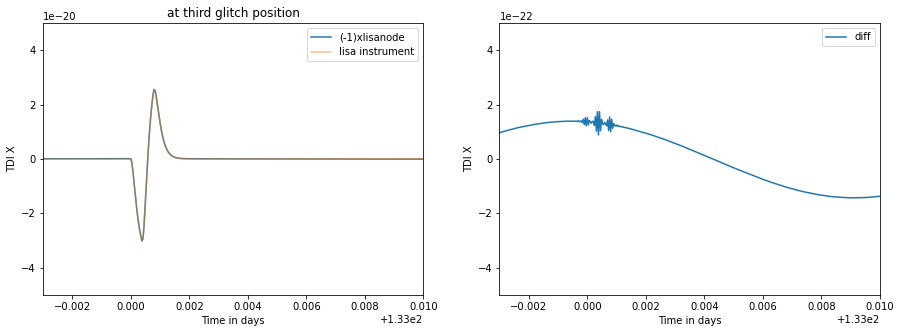

In [7]:
import lisaconstants
fac = -1 # to be fixed by a coming MR
data = scipy.interpolate.InterpolatedUnivariateSpline(mbhb1_ln[:,0], mbhb1_ln[:,1], k=5)(mbhb1_li[:,0])
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("at third glitch position")
plt.plot(mbhb1_li[:,0]/(24*60*60), data*fac, label="(-1)xlisanode")
plt.plot(mbhb1_li[:,0]/(24*60*60), mbhb1_li[:,1], label="lisa instrument", alpha=0.5)
plt.xlabel("Time in days")
plt.ylabel("TDI X")
plt.axis([132.997,133.01,-5e-20, 5e-20])
plt.legend()
plt.subplot(122)
plt.plot(mbhb1_li[:,0]/(24*60*60), (data*fac)-mbhb1_li[:,1], label="diff")
plt.axis([132.997,133.01,-5e-22, 5e-22])
plt.xlabel("Time in days")
plt.ylabel("TDI X")
plt.legend()

## Quicklook at MBHB data set 2

In [8]:
mbhb2_li, attr = h5io.load_array("../run4/mbhb2-lisainstrument-noisefree-tdi.h5")
mbhb2_ln, attr = h5io.load_array("../run4/mbhb2-lisanode-noisefree-tdi.h5")

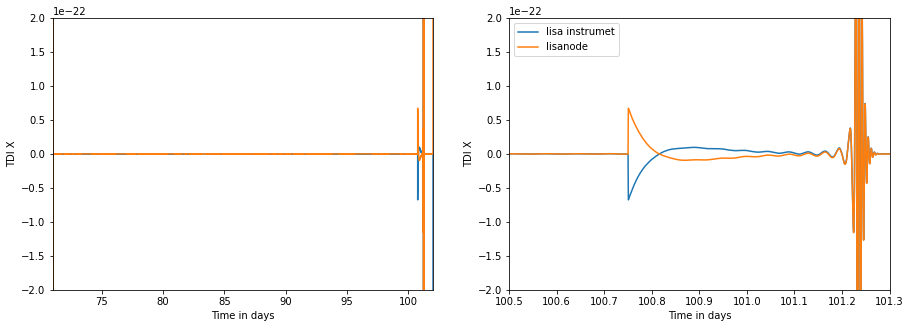

In [9]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(mbhb2_li[:,0]/(24*60*60), mbhb2_li[:,1], label="lisa instrument")
plt.plot(mbhb2_ln[:,0]/(24*60*60), mbhb2_ln[:,1], label="lisanode")
plt.xlabel("Time in days")
plt.ylabel("TDI X")
plt.axis([71,102,-2e-22,2e-22])
plt.subplot(122)
plt.plot(mbhb2_li[:,0]/(24*60*60), mbhb2_li[:,1], label="lisa instrumet")
plt.plot(mbhb2_ln[:,0]/(24*60*60), mbhb2_ln[:,1], label="lisanode")
plt.xlabel("Time in days")
plt.ylabel("TDI X")
plt.axis([100.5,101.3,-2e-22,2e-22])
plt.legend()

## Comparison with expected GW signal

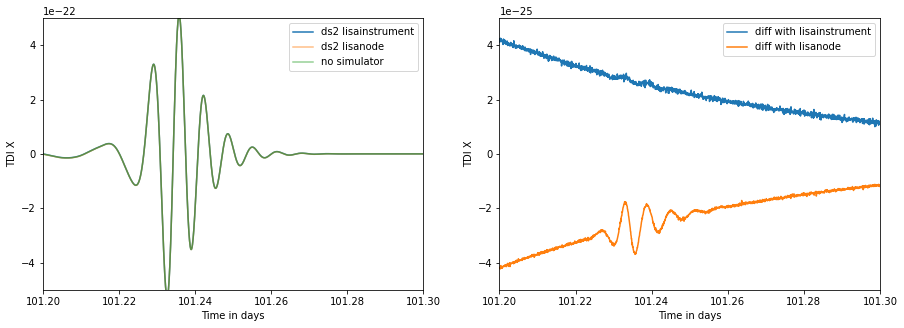

In [10]:
projector.from_file("../run4/mbhb2-y.h5")
tdi_nosim_li = projector.compute_tdi_x(mbhb2_li[:,0], tdi2=True)
tdi_nosim_ln = projector.compute_tdi_x(mbhb2_ln[:,0], tdi2=True)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(mbhb2_li[:,0]/(24*60*60), mbhb2_li[:,1], label="ds2 lisainstrument")
plt.plot(mbhb2_ln[:,0]/(24*60*60), mbhb2_ln[:,1], label="ds2 lisanode", alpha=0.5)
plt.plot(mbhb2_li[:,0]/(24*60*60), tdi_nosim_li, label="no simulator", alpha=0.5)
plt.axis([101.2, 101.3,-5e-22, 5e-22])
plt.xlabel("Time in days")
plt.ylabel("TDI X")
plt.legend()
plt.subplot(122)
plt.plot(mbhb2_li[:,0]/(24*60*60), mbhb2_li[:,1]-tdi_nosim_li, label="diff with lisainstrument")
plt.plot(mbhb2_ln[:,0]/(24*60*60), mbhb2_ln[:,1]-tdi_nosim_ln, label="diff with lisanode")
plt.axis([101.2,101.3,-5e-25,5e-25])
plt.xlabel("Time in days")
plt.ylabel("TDI X")
plt.legend()


## Quicklook at VGB data set

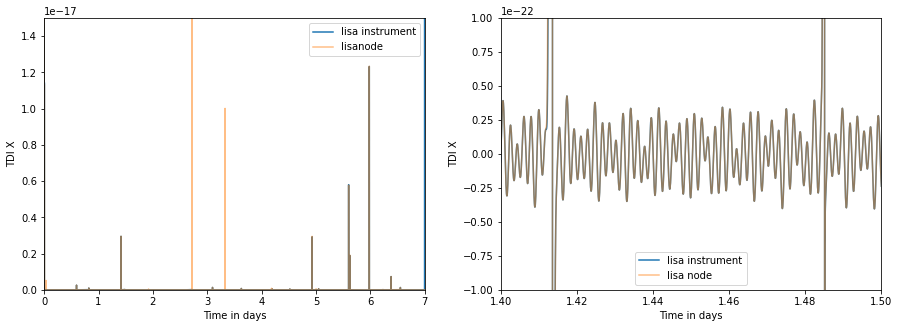

In [11]:
gb_tdi_li, attr = h5io.load_array("../run4/vgb-lisainstrument-noisefree-tdi.h5")
gb_tdi_ln, attr = h5io.load_array("../run4/vgb-lisanode-noisefree-tdi.h5")
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(gb_tdi_li[:,0]/(24*60*60), gb_tdi_li[:,1], label="lisa instrument")
plt.plot(gb_tdi_ln[:,0]/(24*60*60), gb_tdi_ln[:,1], label="lisanode", alpha=0.5)
plt.xlabel("Time in days")
plt.ylabel("TDI X")
plt.legend()
plt.axis([0, 7, -5e-22, 1.5e-17])
plt.subplot(122)
plt.plot(gb_tdi_li[:,0]/(24*60*60), gb_tdi_li[:,1], label="lisa instrument")
plt.plot(gb_tdi_ln[:,0]/(24*60*60), gb_tdi_ln[:,1], label="lisa node", alpha=0.5)
plt.axis([1.4, 1.5, -1e-22, 1e-22])
plt.xlabel("Time in days")
plt.ylabel("TDI X")
plt.legend()


## Comparison with expected GW signal

In [12]:
projector.from_file("../run1/vgb-y.h5")
tdi_nosim_li = projector.compute_tdi_x(gb_tdi_li[:,0], tdi2=True)
tdi_nosim_ln = projector.compute_tdi_x(gb_tdi_ln[:,0], tdi2=True)

Text(0, 0.5, 'TDI X')

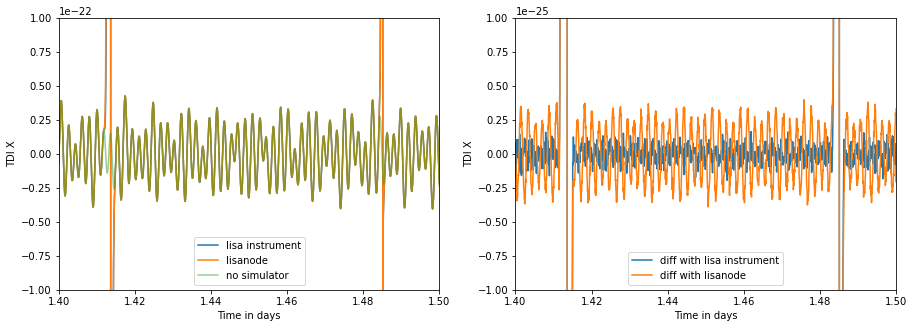

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(gb_tdi_li[:,0]/(24*60*60), gb_tdi_li[:,1], label="lisa instrument")
plt.plot(gb_tdi_ln[:,0]/(24*60*60), gb_tdi_ln[:,1], label="lisanode")
plt.plot(gb_tdi_li[:,0]/(24*60*60), tdi_nosim_li, label="no simulator", alpha=0.5)
plt.axis([1.4, 1.5, -1e-22, 1e-22])
plt.legend()
plt.xlabel("Time in days")
plt.ylabel("TDI X")
plt.subplot(122)
plt.plot(gb_tdi_li[:,0]/(24*60*60), gb_tdi_li[:,1]-tdi_nosim_li, label="diff with lisa instrument")
plt.plot(gb_tdi_ln[:,0]/(24*60*60), gb_tdi_ln[:,1]-tdi_nosim_ln, label="diff with lisanode")
plt.axis([1.4, 1.5, -1e-25, 1e-25])
plt.legend()
plt.xlabel("Time in days")
plt.ylabel("TDI X")


## Comparison of the two simulators at a glitch position

Text(0, 0.5, 'TDI X')

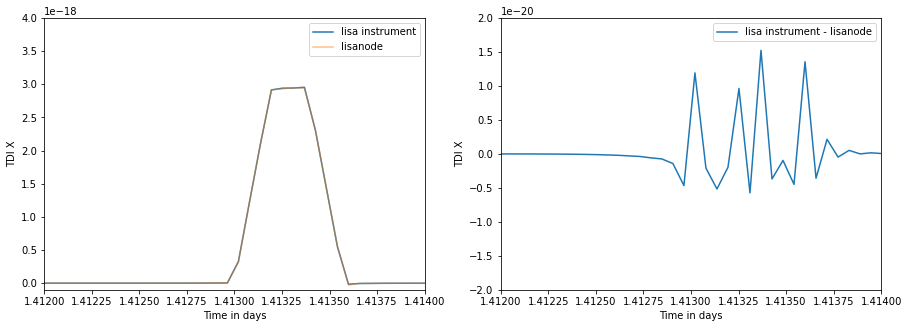

In [14]:
data = scipy.interpolate.InterpolatedUnivariateSpline(gb_tdi_ln[:,0], gb_tdi_ln[:,1], k=5)(gb_tdi_li[:,0])
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(gb_tdi_li[:,0]/(24*60*60), gb_tdi_li[:,1], label="lisa instrument")
plt.plot(gb_tdi_li[:,0]/(24*60*60), data, label="lisanode", alpha=0.5)
plt.axis([1.412, 1.414, -1e-19, 0.4e-17])
plt.legend()
plt.xlabel("Time in days")
plt.ylabel("TDI X")
plt.subplot(122)
plt.plot(gb_tdi_li[:,0]/(24*60*60), gb_tdi_li[:,1]-data, label="lisa instrument - lisanode")
plt.axis([1.412, 1.414, -2e-20, 2e-20])
plt.legend()
plt.xlabel("Time in days")
plt.ylabel("TDI X")

## Check noise level on MBHB1 data set

We include acceleration and OMS (backlink and readout) noise only using default values for the 2 simulators. 
- acc noise: 2.4e-15 # m/s^2/sqrt(Hz)
- backlinknoise: 3.00e-12 #m/sqrt(Hz)
- readoutnoise: 6.35e-12 #m/sqrt(Hz) not sure this is true for lisanode

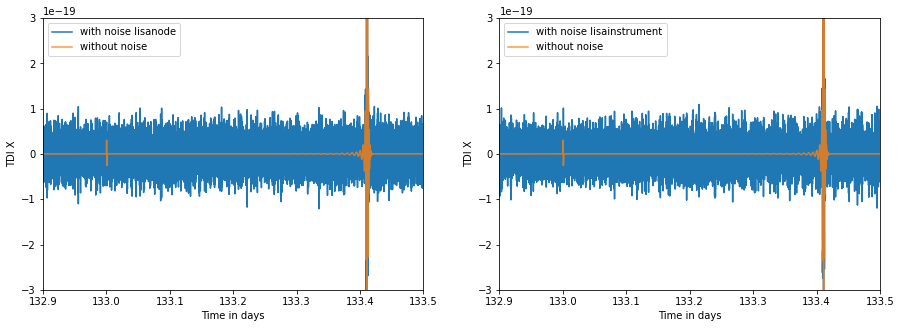

In [15]:
mbhb1_ln_noise, attr = h5io.load_array("../run3/mbhb1-lisanode-withnoise-tdi.h5")
mbhb1_li_noise, attr = h5io.load_array("../run3/mbhb1-lisainstrument-withnoise-tdi.h5")
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(mbhb1_ln_noise[:,0]/(24*60*60), mbhb1_ln_noise[:,1], label="with noise lisanode")
plt.plot(mbhb1_ln[:,0]/(24*60*60), mbhb1_ln[:,1], label="without noise", alpha=0.8)
plt.axis([132.9,133.50,-3e-19,3e-19])
plt.xlabel("Time in days")
plt.ylabel("TDI X")
plt.legend()
plt.subplot(122)
plt.plot(mbhb1_li_noise[:,0]/(24*60*60), mbhb1_li_noise[:,1], label="with noise lisainstrument")
plt.plot(mbhb1_ln[:,0]/(24*60*60), mbhb1_ln[:,1], label="without noise", alpha=0.8)
plt.axis([132.9,133.50,-3e-19,3e-19])
plt.xlabel("Time in days")
plt.ylabel("TDI X")
plt.legend()

Text(0, 0.5, 'PSD X')

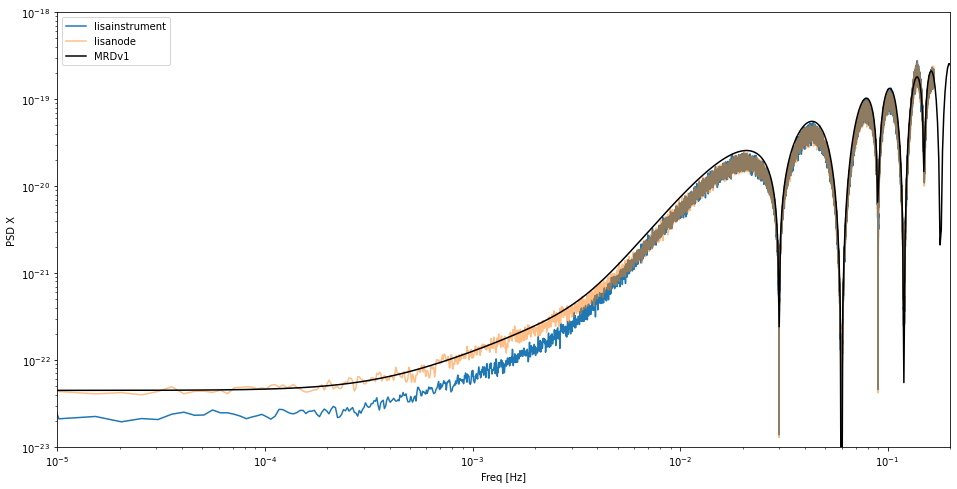

In [24]:
dt = mbhb1_ln_noise[1,0]-mbhb1_ln_noise[0,0]

noise_model = "MRDv1"
freq = np.logspace(-5, 1, 1000)
Nmodel = get_noise_model(noise_model, freq)
Npsd = Nmodel.psd(tdi2=True, option="X", freq=freq)

winln = window(mbhb1_ln_noise[:,0]-mbhb1_ln_noise[0,0])
winli = window(mbhb1_li_noise[:,0]-mbhb1_li_noise[0,0])

mbhb1_ln_noiseonly = mbhb1_ln_noise[:,1] - mbhb1_ln[:,1]
mbhb1_li_noiseonly = mbhb1_li_noise[:,1] - mbhb1_li[:,1]

plt.figure(figsize=(16,8))
f, psdX_ln =  scipy.signal.welch(winln*mbhb1_ln_noiseonly, fs=1.0/dt, window='hanning', nperseg=256*256)
f, psdX_li =  scipy.signal.welch(winli*mbhb1_li_noiseonly, fs=1.0/dt, window='hanning', nperseg=256*256)
plt.loglog(f, np.sqrt(psdX_li), label="lisainstrument")
plt.loglog(f, np.sqrt(psdX_ln), label="lisanode", alpha=0.5)
plt.loglog(freq, np.sqrt(Npsd), label=noise_model, color='black')
plt.axis([1e-5, 0.2, 1e-23, 1e-18])
plt.legend()
plt.xlabel("Freq [Hz]")
plt.ylabel("PSD X")

## Looking at gaps

We introduce 7 hrs gaps every 10-15 days at TDI level, by setting corresponding values to NaN

(127.75, 129.0, -1e-23, 1e-23)

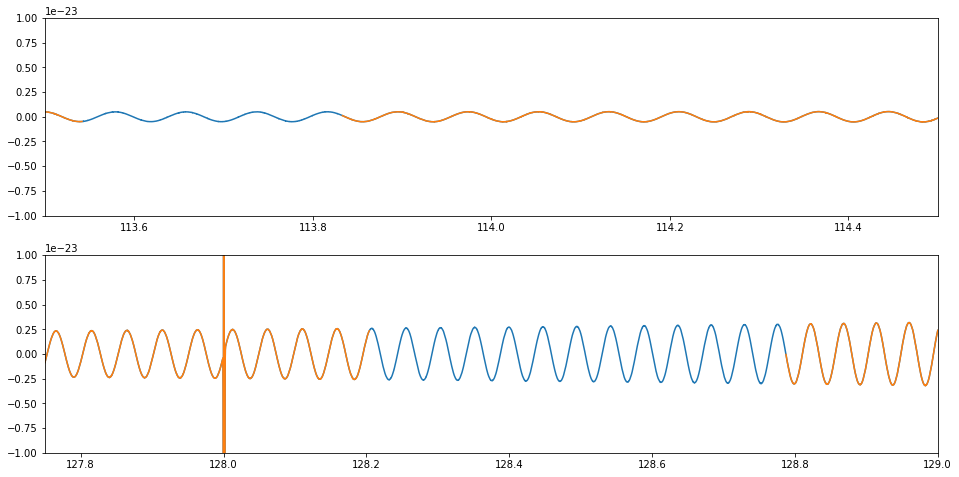

In [17]:
tdi_in, attr = h5io.load_array("../run4/mbhb1-lisanode-noisefree-tdi.h5")
tdi_out, attr = h5io.load_array("../run4/mbhb1-lisanode-noisefree-tdi-gaps.h5")

plt.figure(figsize=(16, 8))
plt.subplot(211)
plt.plot(tdi_in[:,0]/(60*60*24), tdi_in[:,1])
plt.plot(tdi_out[:,0]/(60*60*24), tdi_out[:,1])
plt.axis([103+10.5, 103+11.5, -1e-23, 1e-23])
plt.subplot(212)
plt.plot(tdi_in[:,0]/(60*60*24), tdi_in[:,1])
plt.plot(tdi_out[:,0]/(60*60*24), tdi_out[:,1])
plt.axis([103+24.75, 103+26, -1e-23, 1e-23])

## Non stationary noise

We take resisual TDI AET in freq. domain given by the FoM pipeline for 1 year of observation, based on SciRD noise level. 

In [18]:
from ldc.common.series import FrequencySeries
from ldc.common.series import AET2XYZ, TDI

AET, attr = h5io.load_array("../reduced_1_yr.h5", name="tdi")
A = FrequencySeries(AET[0,:], df=attr['df'], kmin=0)
E = FrequencySeries(AET[1,:], df=attr['df'], kmin=0)
T = FrequencySeries(AET[2,:], df=attr['df'], kmin=0)
dt = 15
AET = TDI([A, E, T], ["A", "E", "T"])
XYZ = AET2XYZ(AET)

In [19]:
Xr = XYZ["X"].ts.ifft(dt=dt) # time domain X

/home/maude/pv39/lib/python3.9/site-packages/ldc-0.1-py3.9-linux-x86_64.egg/ldc/lisa/noise/noise.py:212: RuntimeWarning: divide by zero encountered in true_divide
  Sa_a = self.DSa_a[model] * (1.0 +(0.4e-3/frq)**2) *\
/home/maude/pv39/lib/python3.9/site-packages/ldc-0.1-py3.9-linux-x86_64.egg/ldc/lisa/noise/noise.py:214: RuntimeWarning: divide by zero encountered in power
  self.Sa_d = Sa_a*(2.*np.pi*frq)**(-4.) # in displacement
/home/maude/pv39/lib/python3.9/site-packages/ldc-0.1-py3.9-linux-x86_64.egg/ldc/lisa/noise/noise.py:215: RuntimeWarning: invalid value encountered in multiply
  Sa_nu = self.Sa_d*(2.0*np.pi*frq/CLIGHT)**2 # in rel freq unit
/home/maude/pv39/lib/python3.9/site-packages/ldc-0.1-py3.9-linux-x86_64.egg/ldc/lisa/noise/noise.py:219: RuntimeWarning: divide by zero encountered in true_divide
  self.Soms_d = self.DSoms_d[model] * (1. + (2.e-3/frq)**4) # in displacement
/home/maude/pv39/lib/python3.9/site-packages/ldc-0.1-py3.9-linux-x86_64.egg/ldc/lisa/noise/noise.py:2

(2e-05, 0.1, 1e-49, 1e-37)

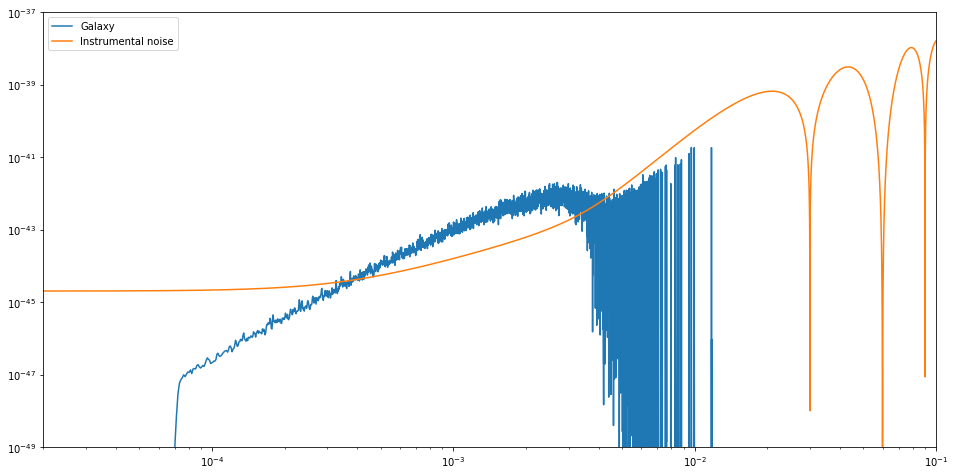

In [20]:
f, psdG =  scipy.signal.welch(Xr, fs=1.0/dt, window='hanning', nperseg=256*256)
freq = np.linspace(0, 1e-1, 512*512)
Npsd = Nmodel.psd(tdi2=True, option="X", freq=freq)
plt.figure(figsize=(16,8))
plt.loglog(f, psdG, label="Galaxy")
plt.loglog(freq, Npsd, label='Instrumental noise')
plt.legend()
plt.axis([2e-5, 0.1, 1e-49, 1e-37])

In [21]:
# interpolation of time domain X to match spritz time range
Xg = scipy.interpolate.InterpolatedUnivariateSpline(np.arange(0,len(Xr)*dt, dt), Xr, k=1)(mbhb1_ln_noise[:,0])

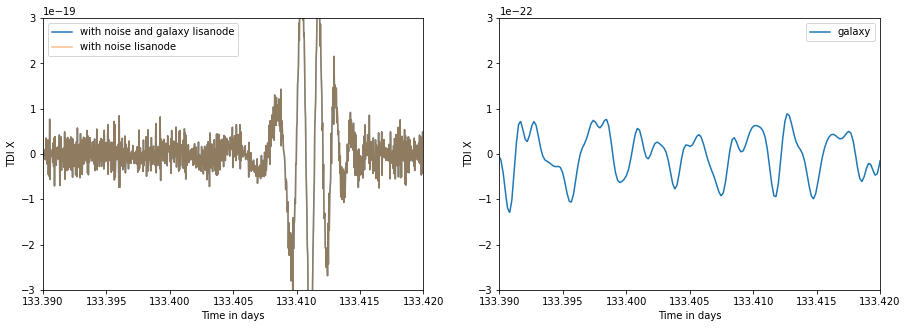

In [22]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(mbhb1_ln_noise[:,0]/(24*60*60), mbhb1_ln_noise[:,1]+Xg, label="with noise and galaxy lisanode")
plt.plot(mbhb1_ln_noise[:,0]/(24*60*60), mbhb1_ln_noise[:,1], label="with noise lisanode", alpha=0.5)
plt.axis([133.39,133.42,-3e-19,3e-19])
plt.xlabel("Time in days")
plt.ylabel("TDI X")
plt.legend()
plt.subplot(122)
plt.plot(mbhb1_ln_noise[:,0]/(24*60*60), Xg, label="galaxy")
plt.axis([133.39,133.42,-3e-22,3e-22])
plt.xlabel("Time in days")
plt.ylabel("TDI X")
plt.legend()